In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/train.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [5]:
wnl=WordNetLemmatizer()
corpus=[]

In [6]:
for i in range(len(data)):
  review=re.sub('[^a-zA-Z]',' ',data['tweet'][i])
  review=review.lower()
  review=review.split()
  review=[wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [7]:
corpus[2]

'bihday majesty'

In [8]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
data['clean_tweets']=corpus

In [10]:
from wordcloud import WordCloud

In [11]:
import matplotlib.pyplot as plt

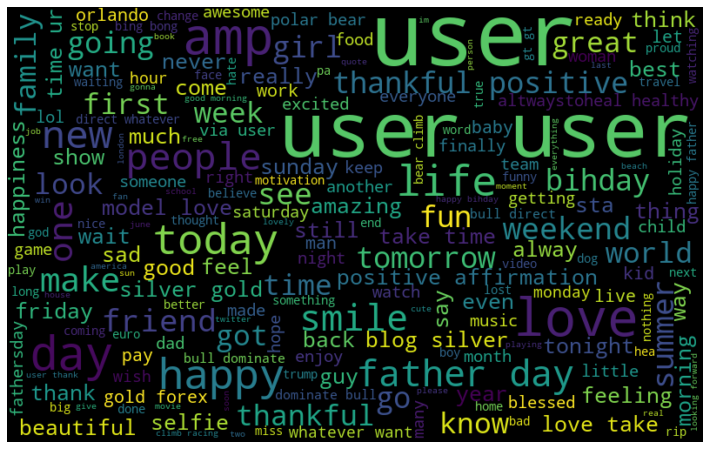

In [12]:
all_words = " ".join([sentence for sentence in data['clean_tweets'][data['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

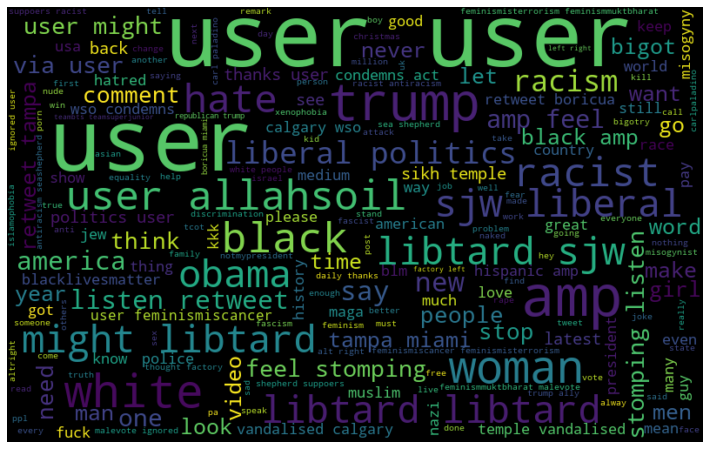

In [13]:
all_words = " ".join([sentence for sentence in data['clean_tweets'][data['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
len(list(set(data['clean_tweets'])))

29173

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(analyzer = "word", 
                             preprocessor = None, 
                             stop_words =  'english', 
                             max_features = 10000,lowercase=True)
data_features = vectorizer.fit_transform(data['clean_tweets'])
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(data_features)
data_mat = data_features_tfidf.toarray()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(data_mat,data['label'],test_size=0.3,random_state=42)

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [19]:
max([len(w) for w in data['clean_tweets']])

129

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rf.score(X_test,y_test)

0.9571383877359474

LETS PREDICT HOW MY MODEL IS PERFORMING

In [31]:
print(rf.predict(vectorizer.transform(["black people are a racism"])))

[1]


In [32]:
print(rf.predict(vectorizer.transform(['very good amazing movie please watch'])))

[0]
